# Lab4-TensorFlow

*Лабораторная работа №4: Обучению первой модели на TensorFlow для распознавания рукописных цифр на датасете MNIST*

## Шаг 1: Загрузка и предобработка данных

- Импортируйте необходимые библиотеки: tensorflow и tensorflow.keras.datasets.mnist

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import ssl
from tensorflow.keras.datasets import mnist

2024-04-19 17:52:11.171690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


- Загрузите датасет MNIST с помощью функции mnist.loaddata()

In [2]:
# Фикс ошибки с SSL сертификатами
ssl._create_default_https_context = ssl._create_unverified_context


# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')


В этом фрагменте кода выполняются две основные операции.

Первая строка кода - это решение проблемы с SSL-сертификатами. В Python модуль `ssl` используется для обеспечения безопасности сетевых соединений с помощью протокола SSL. В некоторых случаях, когда соединение с сервером не может быть защищено из-за проблем с SSL-сертификатом, можно использовать функцию `ssl._create_unverified_context()`. Эта функция создает новый контекст, который не проверяет сертификаты. Это может быть полезно для обхода ошибок сертификата, но следует использовать с осторожностью, так как это может сделать ваше соединение уязвимым для атак.

Вторая часть кода загружает датасет MNIST. MNIST - это большой набор рукописных цифр, который часто используется для обучения различных систем машинного обучения. Функция `mnist.load_data()` загружает набор данных MNIST и возвращает два набора пар - обучающий набор и тестовый набор. Каждый набор содержит изображения и соответствующие им метки. Параметр `path` указывает путь, по которому следует загрузить данные. Если данные уже загружены, они будут прочитаны из этого места. Если нет - они будут загружены из Интернета и сохранены по указанному пути.

- Предобработайте данные: нормализуйте их, преобразуйте в нужный формат (например, масштабирование от 0 до 1)

In [3]:
# Предобработка данных
x_train, x_test = x_train / 255.0, x_test / 255.0


В этой строке кода выполняется нормализация данных обучающего и тестового наборов. 

В контексте обработки изображений, таких как набор данных MNIST, изображения обычно представлены в виде массивов, где каждое значение в массиве представляет интенсивность пикселя. Эти значения обычно находятся в диапазоне от 0 до 255.

Нормализация данных - это важный шаг в предварительной обработке для многих алгоритмов машинного обучения. Она приводит все значения к диапазону между 0 и 1. Это делается путем деления каждого значения на максимальное значение в наборе данных. В данном случае, поскольку максимальное значение интенсивности пикселя равно 255, мы делим все значения на 255.

Это улучшает стабильность и эффективность обучения модели, поскольку меньшие и более унифицированные значения облегчают обучение для многих алгоритмов.

## Шаг 2: Создание нейронной сети

- Используйте модель Sequential из библиотеки tensorflow.keras.models
- Добавьте слои к модели: открытый слой Flatten с inputshape=(28, 28), полносвязанный слой Dense с 128 нейронами и функцией активации ReLU, полносвязанный слой Dense с 10 нейронами и функцией активации softmax

In [4]:
# Создание нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/Users/artemkostylev/Library/Mobile Documents/com~apple~CloudDocs/PROJECTS/ВВИТ/Семестр 2/Lab4-TensorFlow/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


В этом фрагменте кода создается модель нейронной сети с использованием библиотеки TensorFlow и ее высокоуровневого API Keras.

Модель создается как последовательная (`Sequential`), что означает, что слои в модели соединяются последовательно, каждый слой передает свой выход следующему.

Первый слой в этой модели - это слой `Flatten`. Этот слой преобразует входные данные, превращая двумерный массив (28x28 пикселей, что является стандартным размером изображений в наборе данных MNIST) в одномерный массив размером 784 (28*28). Это делается для того, чтобы данные могли быть обработаны полносвязными слоями, которые идут дальше.

Второй слой - это полносвязный слой (`Dense`), состоящий из 128 нейронов (или узлов). В этом слое используется функция активации ReLU (Rectified Linear Unit). ReLU - это простая функция активации, которая возвращает вход, если он больше нуля, и возвращает ноль в противном случае.

Третий и последний слой - это еще один полносвязный слой, но он состоит из 10 нейронов, что соответствует количеству классов в наборе данных MNIST (цифры от 0 до 9). В этом слое используется функция активации softmax, которая преобразует вектор входных данных в вектор вероятностей, где каждое значение представляет вероятность принадлежности входных данных к соответствующему классу.

## Шаг 3: Компиляция модели
- Компилируйте модель с оптимизатором 'adam', функцией потерь 'sparsecategoricalcrossentropy' и метрикой 'accuracy'

In [5]:
# Компиляция модели
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

В этом фрагменте кода происходит компиляция модели нейронной сети, которая была создана ранее. Компиляция модели - это этап, на котором определяются параметры обучения модели.

Аргумент `optimizer='adam'` определяет, какой оптимизатор будет использоваться для обучения модели. Оптимизатор - это алгоритм, который изменяет веса и смещения в модели с целью минимизации функции потерь. "Adam" - это один из наиболее популярных оптимизаторов, так как он эффективен в большинстве случаев.

Аргумент `loss='sparse_categorical_crossentropy'` определяет функцию потерь, которую оптимизатор пытается минимизировать. "Sparse categorical crossentropy" - это функция потерь, которая используется для задач классификации, где классы представлены как целые числа. Она подходит для многоклассовой классификации, когда классы не являются взаимоисключающими.

Аргумент `metrics=['accuracy']` определяет метрики, которые будут вычисляться во время обучения и тестирования модели. В данном случае будет вычисляться точность классификации, которая является долей правильно классифицированных примеров.

## Шаг 4: Обучение модели
- Используйте метод fit для обучения модели на обучающем наборе данных с указанием числа эпох (например, 5 эпох)

In [6]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8775 - loss: 0.4258
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9655 - loss: 0.1185
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9766 - loss: 0.0749
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9825 - loss: 0.0560
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9877 - loss: 0.0402


В этом фрагменте кода происходит обучение модели нейронной сети, которая была создана и скомпилирована ранее.

Метод `fit` используется для обучения модели в течение определенного количества эпох. Эпоха - это один проход по всему набору обучающих данных. В данном случае модель обучается в течение 5 эпох.

Аргументы `x_train` и `y_train` - это обучающие данные и соответствующие им метки. `x_train` - это изображения рукописных цифр, а `y_train` - это соответствующие им метки классов (целые числа от 0 до 9).

Обучение модели может занять некоторое время, в зависимости от размера обучающего набора данных, сложности модели и количества эпох.

Результат обучения (объект `history`) содержит информацию о процессе обучения, включая значения функции потерь и метрик на каждой эпохе. Эту информацию можно использовать для анализа процесса обучения, например, для определения, происходит ли переобучение.

## Шаг 5: Оценка качества модели
- Используйте метод evaluate для оценки качества модели на тестовом наборе данных

In [7]:
# Оценка качества модели
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - accuracy: 0.9719 - loss: 0.0854


В этом фрагменте кода происходит оценка качества обученной модели на тестовых данных.

Метод `evaluate` используется для оценки функции потерь и метрик модели на тестовых данных. В данном случае тестовые данные (`x_test`) и соответствующие им метки (`y_test`) передаются в метод `evaluate`.

Результатом выполнения этого метода является список, который содержит значения функции потерь и всех метрик модели на тестовых данных. В данном случае возвращаемые значения сохраняются в переменных `test_loss` и `test_accuracy`.

`test_loss` - это значение функции потерь модели на тестовых данных. Меньшее значение функции потерь указывает на лучшее качество модели.

`test_accuracy` - это значение метрики точности модели на тестовых данных. Это доля правильно классифицированных примеров. Большее значение точности указывает на лучшее качество модели.

- Выведите точность модели на тестовом наборе данных

In [8]:
print(f'Точность модели на тестовом наборе данных: {test_accuracy}')

Точность модели на тестовом наборе данных: 0.9763000011444092


## Шаг 6: Анализ результатов
- Импортируйте библиотеку matplotlib.pyplot для построения графика

In [9]:
# Анализ результатов
import matplotlib.pyplot as plt

- Постройте график кривой обучения (accuracy) с помощью данных из истории обучения

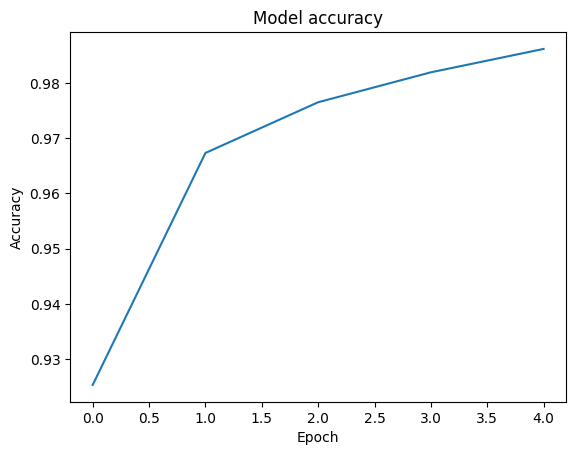

In [10]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

**Данный график показывает, как менялась точность модели на каждой эпохе обучения (по оси X - эпохи, по оси Y - точность)**